#####  Parte 2 de 4
#### Ingeniero en Sistemas: Erick J. Pineda Amézquita  
Correo de contacto: epineda.amezquita@gmail.com  
github: https://github.com/epinedaWorks/

Ejercicios basados en el curso de DataCamp  
https://campus.datacamp.com/courses/image-processing-in-python/


# Contornos, ecualización de imágenes 


## Procesamiento de imagenes -- Requisitos

Para los siguientes ejemplos, se va a utilizar la herramienta de SCIKIT IMAGE.  
Se requiere instalar dicha librería para hacer uso de todas las funciones que provee la herramienta.  
Para instalar en Windows se requiere acceder a la consola de comandos en modo Administrador y ejecutar la siguiente instrucción:  


**$ pip install scikit-image**  

Si no funciona, probar con:   

**$ conda install -c conda-forge scikit-image**  

No esta de mas realizar un test de los paquetes que se requieren, ya sea antes o después de la instalación de scikit-image por medio de las siguientes instrucciones:  

**$ pytest --pyargs skimage**

Fuente:  
https://scikit-image.org/docs/stable/install.html  
  
**Como primer paso: Ejecutar las siguientes lineas para saber si todo está correcto, si no funciona, revisar instalación**


In [2]:
# Import the modules from skimage
from skimage import data, color

import matplotlib.pyplot as plt
import numpy as np
import cv2


## Ejemplo 1, Contornos por medio del operador Sobel

Comenzamos por importar la librería, si la siguiente instrucción muestra error, será necesario revisar la instalación de scikit image.

Se crea un metodo que va a leer las imagenes por medio de matplotlib.

In [4]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

    

Se importa la imagen local y se aplican conversiones de color.

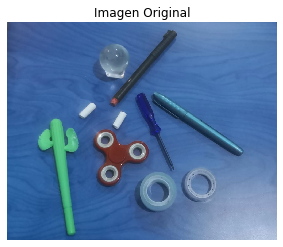

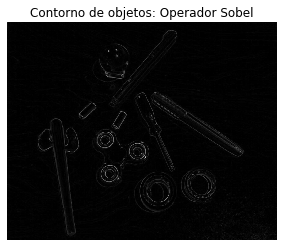

In [8]:
# Import the filters module and sobel function
from skimage.filters import sobel

imgName = "lapiceros.JPG"    
imgLapiceros = cv2.imread(imgName)

# Make the image grayscale
imgLapicerosToGray= color.rgb2gray(imgLapiceros)

# Apply edge detection filter
imgAplicarSobel = sobel(imgLapicerosToGray)

# Show original and resulting image to compare
show_image(imgLapiceros, "Imagen Original")
show_image(imgAplicarSobel, "Contorno de objetos: Operador Sobel")


Se crea una función de comparación para dos imagenes:

In [9]:
def plot_comparison(original, filtered, title_filtered):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True,
  sharey=True)
  ax1.imshow(original, cmap=plt.cm.gray)
  ax1.set_title('original')
  ax1.axis('off')
  ax2.imshow(filtered, cmap=plt.cm.gray)
  ax2.set_title(title_filtered)
  ax2.axis('off')


### Filtro Gaussiano para reducir ruido o nitidez

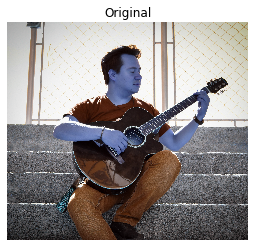

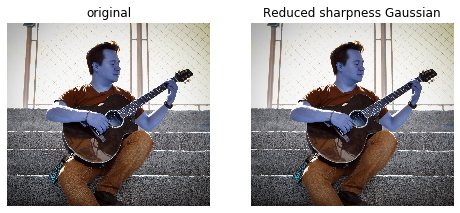

In [13]:
# Import Gaussian filter 
from skimage.filters import gaussian

imgName = "guitarrista.JPG"    
imgGuitarrista = cv2.imread(imgName)


# Apply filter
gaussian_image = gaussian(imgGuitarrista,multichannel=True)

# Show original and resulting image to compare
show_image(imgGuitarrista, "Original")
plot_comparison(imgGuitarrista, gaussian_image, "Reduced sharpness Gaussian")

## Manipulación del contraste:
Existen diferentes formas de modificar el contraste, una de las mas comunes es por medio del histograma de una imágen ya que permite utilizar técnicas de probabilidad, para dicho método existen 3 divisiones:  
+ Ecualización de Histograma estándar:  
Utiliza valores que se presentan en todo el histograma. El contraste se encuentra operantdo el máximo menos el mínimo.  
Por ejemplo, si el valor mínimo es 150 y el máximo 251, esos valores tomará, no precesimante el valor 0 y el valor 255, depende de la imágen. Por lo tanto el contraste será: 251-150 = 101
+ Ecualización de Histograma adaptativo:  
Utiliza métodos dinámicos para encontrar un contraste no sobreexpuesto, se utiliza un parámetro normalizado, entre 0 y 1 para asignar la medida de contraste.
+ Contraste de ecualización de histograma adaptativo limitado (CLAHE)
Hibrido de los casos anteriores.



### Ecualizacón por medio del  Metodo Estándar 
Para este ejemplo se han colocado 3 diferentes imágenes.  
Queda pendiente resolver la correcta visualización de los colores RGB.

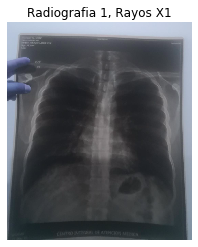

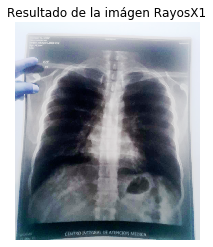

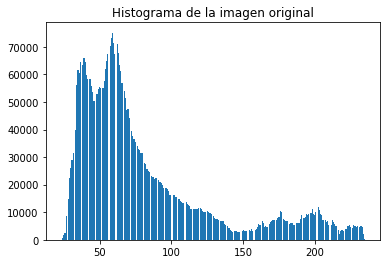

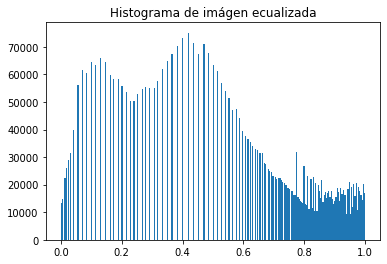

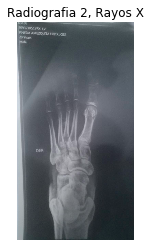

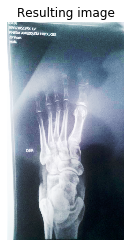

Histograma: 


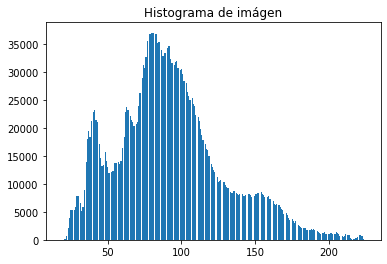

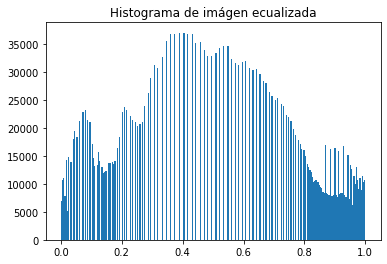

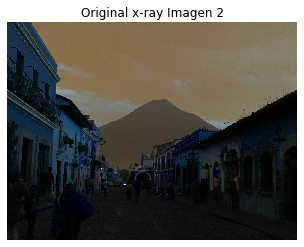

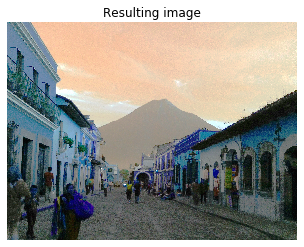

Histograma: 


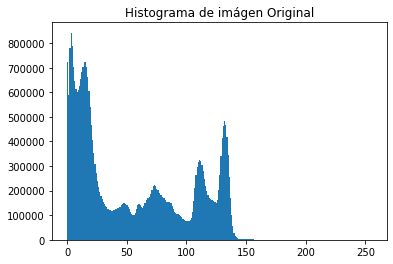

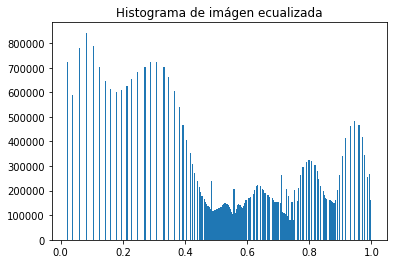

In [22]:
from skimage import exposure

imgName = "radio1.JPG"    
imgRadio1 = cv2.imread(imgName)

imgName2 = "radio2.JPG"    
imgRadio2 = cv2.imread(imgName2)

imgName3 = "volcanGuatemala.JPG"    
imgVolcanGuatemala = cv2.imread(imgName3)

# Mostrar la imagen original
show_image(imgRadio1, 'Radiografia 1, Rayos X1')

# Modificación del contraste por medio del método "exposure"
imgRadio1Equalizar =  exposure.equalize_hist(imgRadio1)

# Mostrar los resulados de la ecualización.
show_image(imgRadio1Equalizar, 'Resultado de la imágen RayosX1')

## Mostrar ambos histogramas
plt.title('Histograma de la imagen original')
plt.hist(imgRadio1.ravel(), bins=256)
plt.show()

plt.title('Histograma de imágen ecualizada')
plt.hist(imgRadio1Equalizar.ravel(), bins=256)
plt.show()


######## Se repite, obviar optimización para crear método ###############

# Mostrar la imagen original
show_image(imgRadio2, 'Radiografia 2, Rayos X')

# Modificación del contraste por medio del método "exposure"
imgRadio2Equalizar =  exposure.equalize_hist(imgRadio2)

# Mostrar los resulados de la ecualización.
show_image(imgRadio2Equalizar, 'Resulting image')

## Mostrar ambos histogramas
plt.title('Histograma de imágen')
print("Histograma: ")
plt.hist(imgRadio2.ravel(), bins=256)
plt.show()

plt.title('Histograma de imágen ecualizada')
plt.hist(imgRadio2Equalizar.ravel(), bins=256)
plt.show()


######## Se repite otra vez, obviar optimización para crear método ###############

# Mostrar la imagen original
show_image(imgVolcanGuatemala, 'Original x-ray Imagen 2')

# Modificación del contraste por medio del método "exposure"
imgVolcanGuatemalaEqualizar =  exposure.equalize_hist(imgVolcanGuatemala)

# Mostrar los resulados de la ecualización.
show_image(imgVolcanGuatemalaEqualizar, 'Resulting image')

## Mostrar ambos histogramas
plt.title('Histograma de imágen Original')
print("Histograma: ")
plt.hist(imgVolcanGuatemala.ravel(), bins=256)
plt.show()

plt.title('Histograma de imágen ecualizada')
plt.hist(imgVolcanGuatemalaEqualizar.ravel(), bins=256)
plt.show()






